In [1]:
import  glob
import  numpy                          as     np
import  pylab                          as     pl
import  astropy.io.fits                as     fits
 
from    astropy.table                  import Table, vstack, hstack
from    desitarget.sv1.sv1_targetmask  import desi_mask, bgs_mask, mws_mask, scnd_mask

# Clauds LBGs

In [2]:
def gather_tile(tileid):
    # fpath  = '/global/cscratch1/sd/mjwilson/DESILBGSPEC/June21/{}/v2.1/zbest-?-{}.fits'.format(tileid, tileid)
    fpath    = '/global/cscratch1/sd/mjwilson/DESILBGSPEC/f3//v4.1//tiles/cumulative/{}/*/redrock-*'.format(tileid)
    
    files    = glob.glob(fpath)
    files    = [fits.open(x) for x in files] 
    
    zbests   = [Table(x['REDSHIFTS'].data) for x in files]
    zbests   = vstack(zbests)
    
    fmaps    = [Table(x['FIBERMAP'].data) for x in files]
    fmaps    = vstack(fmaps) 
    
    assert  np.all(zbests['TARGETID'] == fmaps['TARGETID'])
    
    return  {tileid: hstack([zbests, fmaps])}

In [3]:
results = {}

In [4]:
# HETDEX
results.update(gather_tile(80869))

In [5]:
# HETDEX-2 (not in Fuji pre-test F3)
# results.update(gather_tile(80870))

In [6]:
# Clauds
results.update(gather_tile(80871))

In [7]:
# Clauds-2
results.update(gather_tile(80872))

In [8]:
results[80871]

TARGETID_1,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,TARGETID_2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y
int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,str3,float32,float32,int32,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32
616088618083025980,11580.284447138663,-1.371317091032303e-06 .. 0.0,4.130256380739619,0.002183981385776988,5,7929,QSO,,4,0.4247503303922713,616088618083025980,6,523,6523,3000,0,151.21143627714548,3.350971263701316,0.0,0.0,0.0,5400.0,4294967296,4,SKY,-276.42047,291.46405,-1,0.9427832886133586,63,9010,1513p032,349692,1084,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043219127,0.026860643,0.055321224,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,,-1,-1,0,0,0,0,4294967296,0,0,151.21143627714548,3.350971263701316,80871,11,13420.532,4,1,0.001,0.0030895718,-0.00054545456,0.004709758,151.21143999879357,0.038993947,3.350973175273198,0.063013434,0.79265344,-276.436,291.403
616088618078831375,11946.38049569726,8.364015007226987 .. -0.4144115898784054,0.9628034293112491,9.60498910180886e-05,5,7929,GALAXY,,10,1.3705246224999428,616088618078831375,6,474,6474,3001,0,151.118555328511,3.2898452585821985,0.0,0.0,0.0,5400.0,4294967296,4,SKY,-251.51077,274.4417,-1,0.9902652039086947,63,9010,1510p032,349691,783,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.022835655,0.021733953,0.0024964693,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,,-1,-1,0,0,0,0,4294967296,0,0,151.118555328511,3.2898452585821985,80871,11,13420.532,4,1,-0.0011818182,0.004963503,0.0033636363,0.006802406,151.11855123063125,0.06576957,3.289832551410784,0.08042231,0.792695,-251.5209,274.38235
243359268470827,8.999999999999996e+99,0.0 .. 0.0,-0.0019957014509158224,4.131159871613317e-48,1570,0,STAR,K,5,1.942668892225729e+84,243359268470827,6,510,6510,3002,512,151.17589244285338,3.3018136694615223,0.0,0.0,2021.2006,5400.0,4611686018427387904,1,TGT,-266.5828,278.1285,3800,0.7168580160237878,1,0,,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,,3800,1,4611686018427387904,0,0,36028797018963968,0,0,0,151.17589244285338,3.3018136694615223,80871,0,0.0,4,1,1.4660909,1.4662681,-4.688182,4.6882257,151.18080802397,0.30435994,3.3194304195301,0.26646987,0.0,-268.06165,282.75745
243359260082224,12134.28510031104,7.0183325513157 .. 2.8268063299005393,1.1865008349116912,0.00011308103327749897,4,7929,GALAXY,,10,2.844969302415848,243359260082224,6,225,6225,3003,0,150.5742743451722,3.2729662878519545,0.0,0.0,2021.2006,5400.0,4611686018427387904,1,TGT,-112.998085,266.5294,3800,0.8060626084

In [30]:
scnd_types = sorted(scnd_mask.names())

In [31]:
tids = sorted(list(results.keys()))
tids

[80869, 80871, 80872]

In [37]:
for tid in tids:
    print('\n\n----  TILEID: {:d}  ----\n'.format(tid))

    for x in scnd_types:
        isin  = (results[tid]['SV1_SCND_TARGET'].data & scnd_mask[x]) != 0
        nscnd = np.count_nonzero(isin)
    
        print('{}\t{}'.format(x.ljust(16), nscnd))



----  TILEID: 80869  ----

BACKUP_CALIB    	71
BHB             	1
BRIGHT_HPM      	0
BRIGHT_TOO      	0
DARK_TOO        	0
DC3R2_GAMA      	0
DESILBG_BXU_FINAL	0
DESILBG_G_FINAL 	0
DESILBG_TMG_FINAL	0
FAINT_HPM       	2
FIRST_MALS      	0
GAL_CLUS_2ND    	0
GAL_CLUS_BCG    	0
GAL_CLUS_SAT    	0
HETDEX_HP       	25
HETDEX_MAIN     	1934
HPM_SOUM        	0
HSC_HIZ_SNE     	0
ISM_CGM_QGP     	0
LBG_TOMOG_COSMOS_FINAL	0
LBG_TOMOG_W3    	0
LBG_TOMOG_XMM   	0
LOW_MASS_AGN    	6
LOW_Z           	1948
M31_KNOWN       	0
M31_QSO         	0
M31_STAR        	0
MWS_CALIB       	71
MWS_CLUS_GAL_DEEP	0
MWS_MAIN_CLUSTER_SV	0
MWS_RRLYR       	1
PSF_OUT_BRIGHT  	0
PSF_OUT_DARK    	0
PV_BRIGHT       	0
PV_DARK         	0
QSO_RED         	0
SN_HOSTS        	0
SPCV            	0
STRONG_LENS     	0
UDG             	0
UNWISE_BLUE     	0
UNWISE_BLUE_BRIGHT_II	0
UNWISE_BLUE_FAINT_II	0
UNWISE_GREEN    	0
UNWISE_GREEN_II_3700	0
UNWISE_GREEN_II_3800	0
UNWISE_GREEN_II_3900	0
UNWISE_GREEN_II_4000	0
VETO         

In [43]:
keep_types = ['HETDEX_HP', 'HETDEX_MAIN', 'DESILBG_TMG_FINAL', 'DESILBG_BXU_FINAL', 'DESILBG_G_FINAL']
keep_types

['HETDEX_HP',
 'HETDEX_MAIN',
 'DESILBG_TMG_FINAL',
 'DESILBG_BXU_FINAL',
 'DESILBG_G_FINAL']

In [51]:
for tid in tids:
    print()
    
    results[tid]['IN_SAMPLE'] = np.zeros(len(results[tid]), dtype=bool)
    
    for kt in keep_types:
        in_kt = (results[tid]['SV1_SCND_TARGET'].data & scnd_mask[kt]) != 0
        
        results[tid]['IN_SAMPLE'] = results[tid]['IN_SAMPLE'].data | in_kt
        
        print('{}\t{}\t{}'.format(tid, kt.ljust(16), np.count_nonzero(in_kt)))
        
    print('{}\t{}'.format(tid, np.mean(results[tid]['IN_SAMPLE'])))


80869	HETDEX_HP       	25
80869	HETDEX_MAIN     	1934
80869	DESILBG_TMG_FINAL	0
80869	DESILBG_BXU_FINAL	0
80869	DESILBG_G_FINAL 	0
80869	0.3918

80871	HETDEX_HP       	0
80871	HETDEX_MAIN     	0
80871	DESILBG_TMG_FINAL	931
80871	DESILBG_BXU_FINAL	1221
80871	DESILBG_G_FINAL 	842
80871	0.5988

80872	HETDEX_HP       	0
80872	HETDEX_MAIN     	0
80872	DESILBG_TMG_FINAL	613
80872	DESILBG_BXU_FINAL	1721
80872	DESILBG_G_FINAL 	1128
80872	0.6924


Text(0, 0.5, '$\\Delta N/\\Delta z$')

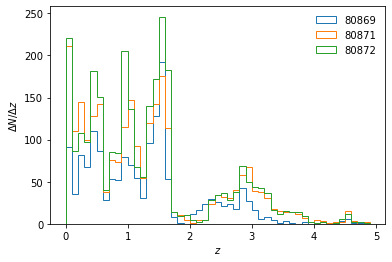

In [54]:
for tid in tids:
    isin = results[tid]['IN_SAMPLE']
    
    pl.hist(results[tid]['Z'][isin], bins=np.arange(0.0, 5.0, 0.1), histtype='step', label=tid)

pl.legend(frameon=False)

pl.xlabel('$z$')
pl.ylabel('$\Delta N/\Delta z$')

# Done.